### 10. 기울기 소실(Gradient Vanishing)과 폭주(Exploding)

In [2]:
from IPython.display import Image

#### 요약
1. 기울기 소실
- 깊은 인공 신경망을 학습하다보면 역전파 과정에서 입력층으로 갈수록 기울기가 점차적으로 작아지는 현상이 발생할 수 있다.
- 입력층에 가까운 층들에서 가중치들이 업데이트가 제대로 되지 않으면 최적의 모델을 찾을 수 없게 된다.
- 이를 기울기 소실(Gradient Vanishing)이라고 한다.

2. 기울기 발산
- 반대로, 기울기가 점차 커지더니 가중치들이 비정상적으로 큰 값이 되면서 발산하기도 한다.
- 이를 기울기 폭주(Gradient Exploding)이라고 하며, 뒤에서 배울 순환 신경망(RNN)에서 발생할 수 있다.

3. 기울기 소실 또는 기울기 폭주를 막는 방법들에 대해서 공부 

----------------------------------------------------------------------------------------------------------

#### 1. ReLU와 ReLU의 변형들
- 시그모이드 함수를 사용 -> 입력의 절대값이 클 경우에 시그모이드 함수의 출력값이 0 또는 1에 수렴하면서 기울기가 0에 가까워진다. 
- 그래서 역전파 과정에서 전파 시킬 기울기가 점차 사라져서 입력층 방향으로 갈수록 제대로 역전파가 되지 않는 기울기 소실 문제가 발생할 수 있다.
- 해결 방법
    - 은닉층에서 시그모이드나 하이퍼볼릭탄젠트 함수를 사용하지 말자
    - LeakyReLU를 사용하면 모든 입력값에 대해서 기울기가 0에 수렴하지 않아 죽은 ReLU 문제를 해결한다.
    - 은닉층에서는 ReLU나 Leaky ReLU와 같은 ReLU 함수의 변형들을 사용하자

----------------------------------------------------------------------------------------------------------

#### 2. 가중치 초기화(Weight initialization)

[개념정리]
- 같은 모델을 훈련시키더라도 가중치가 초기에 어떤 값을 가졌느냐에 따라서 모델의 훈련 결과가 달라지기도 한다.
즉, 가중치 초기화만 적절히 해줘도 기울기 소실과 같은 문제를 완화시킬 수 있다. 

##### 1. 세이비어 초기화(Xavier Initialization)

- 가중치 초기화가 모델에 미치는 영향을 분석하여 새로운 초기화 방법을 제안했는데, 제안한 사람의 이름을 따서 세이비어 초기화 또는 글로럿 초기화라고 한다.
- 이 방법은 균등 분포 또는 정규 분포로 초기화 할 때 두가지 경우로 나뉜다.
- 이전 층의 뉴런 개수와 다음 층의 뉴런 개수를 가지고 식을 세운다.
    - 이전 층의 뉴런 개수를 n_in, 다음 층의 뉴런의 개수를 n_out이라고 가정
- 글로럿과 벤지오의 논문에서는 **균등분포**를 사용하여 가중치를 초기화할 경우 다음과 같은 균등분포 범위를 사용하라고 한다. 
    - W ~ Uniform(-sqrt(6 / (n_in + n_out)), sqrt(6 / (n_in + n_out))) 

    - sqrt(6 / (n_in + n_out))을 m이라고 하였을 때, -m과 +m사이의 균등분포를 의미한다. 
- **정규분포**로 초기화할 경우에는 평균이 0이고, 표준편차가 sigma가 다음을 만족하도록 한다. 
    - sigma = sqrt(2 / (n_in + n_out))
- 세이비어 초기화의 특징
    - 여러 층의 기울기 분산 사이에 균형을 맞춰서 특정 층이 너무 주목을 받거나 다른 층이 뒤쳐지는 것을 막는다.
    - 시그모이드 함수, 하이퍼 볼릭 탄젠트 함수와 같은 S자 형태인 활성화 함께 사용할 경우에는 좋은 성능을 보인다. 
    - ReLU와 함께 사용할 경우에는 성능이 좋지 않다.
    - ReLU, ReLU의 변형함수들을 활성화 함수로 사용할 경우에는 다른 초기화 방법을 사용하는 것이 좋은데 이를 **He 초기화**라고 한다. 


##### 2. He 초기화(He initialization)
- He 초기화는 세이비어 초기화와 유사하게 정규분포와 균등분포 두 가지 경우로 나뉜다.
- 하지만 세이비어 초기화와 다르게 다음 층의 뉴런의 수를 반영하지 않는다. 
    - 전과 같이 이전 층의 뉴런의 개수를 n_in이라고 가정
- He 초기화는 균등 분포로 초기화할 경우에는 다음과 같은 균등 분포 범위를 가지도록 한다. 
    - W ~ Uniform(-sqrt(6 / n_in), +sqrt(6 / n_in))
- 정규분포로 초기화할 경우에는 표준편차 sigma가 다음을 만족하도록 한다.
    - sigma = sqrt(2 / n_in)

[정리해보자면]
- **시그모이드 함수나 하이퍼볼릭탄젠트 함수를 사용할 경우에는 세이비어 초기화**방법이 효율적이다.
- **ReLU 계열 함수를 사용할 경우에는 He 초기화** 방법이 효율적이다.
- **ReLU + He 초기화 방법이 좀 더 보편적**이다. 

----------------------------------------------------------------------------------------------------------

#### 3. 배치 정규화(Batch Normalization)

[개념정리]
- ReLU 계열의 함수와 He 초기화를 사용하는 것만으로도 어느 정도 기울기 소실과 폭주를 완화 시킬 수 있지만, 두 방법을 사용하더라도 훈련 중에 언제든 다시 발생할 수 있다. 
- 기울기 소실이나 폭주를 예방하는 또 다른 방법은 **배치 정규화**이다.
    - 인공 신경망의 각 층에 들어가는 입력을 평균과 분산으로 정규화하여 학습을 효율적으로 만든다. 

##### 1. 내부 공변량 변화(Internal Covariate Shift)
- 내부 공변량 변화 : 학습 과정에서 **층 별로 입력 데이터 분포가 달라지는 현상**
    - 이전 층들의 학습에 의해 이전 층의 가중치 값이 바뀌게 되면, 현재 층에 전달되는 입력 데이터의 분포가 현재 층이 학습했던 시점의 분포와 차이가 발생한다.
    - 배치 정규화를 제안한 논문에서는 기울기 소실/폭주 등의 딥러닝 모델의 불안전성이 층마다 입력의 분포가 달라지기 때문이라고 주장
- 공변량 변화는 훈련 데이터의 분포와 테스트 데이터의 분포가 다른 경우를 의미한다. 
- 내부 공변량 변화는 신경망 층 사이에서 발생하는 입력 데이터의 분포 변화를 의미한다. 

##### 2. 배치 정규화(Batch Normalization)
- 한 번에 들어오는 배치 단위로 정규화하는 것을 말한다.
- 배치 정규화는 각 층에서 활성화 함수를 통과하기 전에 수행된다.
- 배치 정규화 요약
    - 입력에 대해 평균을 0으로 만들고 정규화를 한다. 
    - 정규화 된 데이터에 대해서 스케일과 시프트를 수행한다.
    - 이 때 두 개의 매개변수 V와 beta를 사용한다.
        - V : 스케일을 위해 사용
        - beta : 시프트를 위해 사용
    - 다음 레이어에 일정한 범위의 값들만 전달되게 한다. 

- 배치 정규화 수식

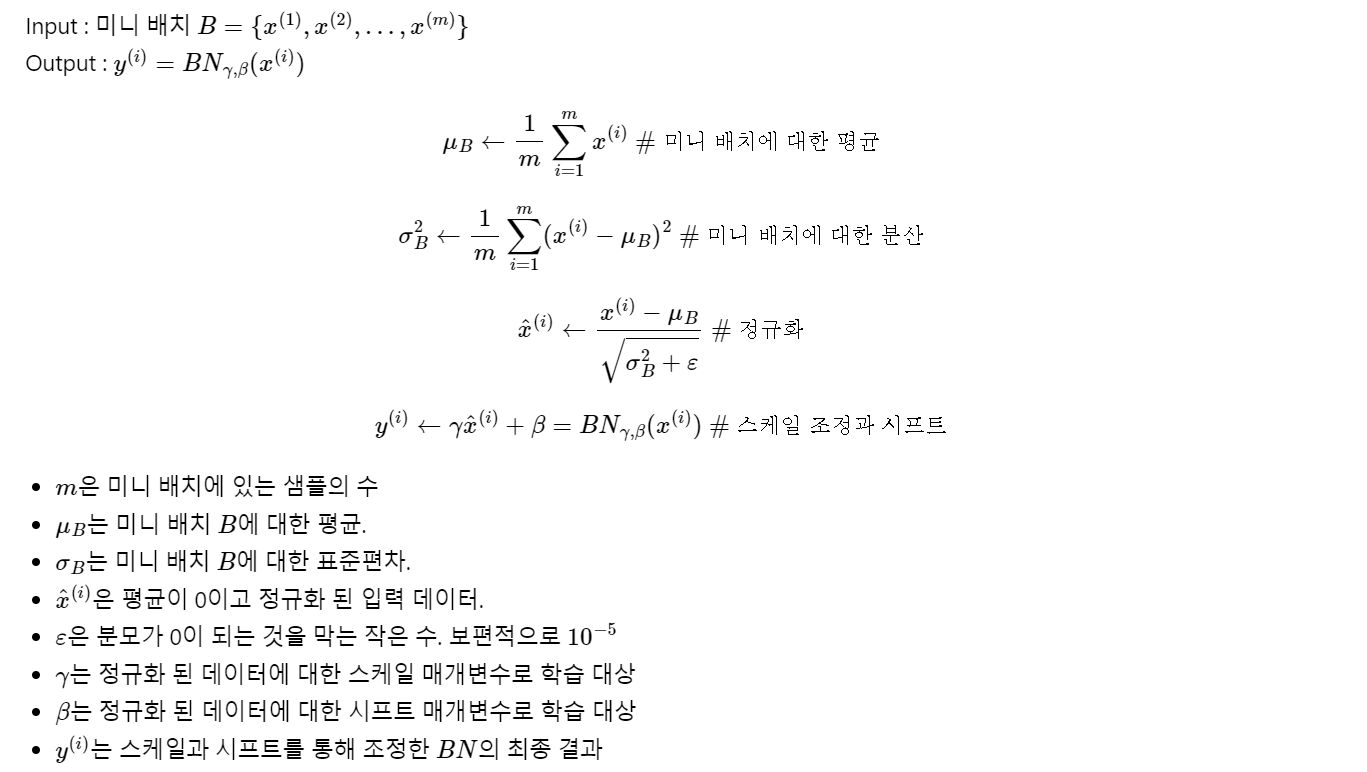

In [3]:
Image("o3.PNG")

- 배치 정규화는 학습 시 배치 단위의 평균과 분산들을 차례대로 받아 이동 평균과 이동 분산을 저장해 놓았다가 테스트 할 때는 해당 배치의 평균과 분산을 구하지 않고 구해놓았던 것으로 정규화를 한다. 
- 배치 정규화를 사용하면 ?
    - 시그모이드 함수나 하이퍼볼릭탄젠트 함수를 사용하더라도 기울기 소실 문제가 크게 개선된다.
    - 가중치 초기화에 훨씬 덜 민감해진다. 
    - 훨씬 큰 학습률을 사용할 수 있어 학습 속도를 개선시킨다.
    - 미니 배치마다 평균과 표준편차를 계산하므로 훈련 데이터에 일종의 잡음을 넣는 부수 효과로 과적합을 방지하는 효과도 낸다. (하지만 부수적 효과이므로 드롭아웃과 함께 사용하는 것이 좋다.)
    - 배치 정규화는 모델을 복잡하게 하며, 추가 계산을 하는 것이므로 테스트 데이터에 대한 예측 시에 실행 시간이 느려진다. 그래서 배치 정규화가 꼭 필요한지 고민이 필요하다.
    - 배치 정규화의 효과는 굉장하지만 내부 공변량 변화때문은 아니라는 논문도 있다. 

##### 3. 배치 정규화의 한계
- 미니 배치 크기에 의존적이다.
    - 너무 작은 배치 크기에서는 잘 동작하지 않을 수 있다.
    - 작은 미니 배치에서는 배치 정규화의 효과가 극단적으로 작용되어 훈련에 악영향을 줄 수 있다.
    - 배치 정규화를 적용할때는 크기가 어느 정도 되는 미니 배치에서 하는 것이 좋다. 
- RNN에 적용하기 어렵다.
    - RNN은 각 시점마다 다른 통계치를 가진다.
    - 이것은 RNN에 배치 정규화를 적용하는 것을 어렵게 만든다.
    - RNN에서 배치 정규화를 적용하기 위한 몇가지 논문이 제시되었지만, 배치 크기에도 의존적이지 않으면서 RNN에도 적용하는 것이 수월한 **층 정규화(layer normalization)** 라는 방법을 공부

----------------------------------------------------------------------------------------------------------

#### 4. 층 정규화(Layer Normalization)

- 배치 정규화를 시각화
    - m이 3이고, feature의 수가 4일 때의 배치 정규화
- 미니 배치 : 동일한 feature 개수들을 가진 다수의 샘플들을 의미한다. 

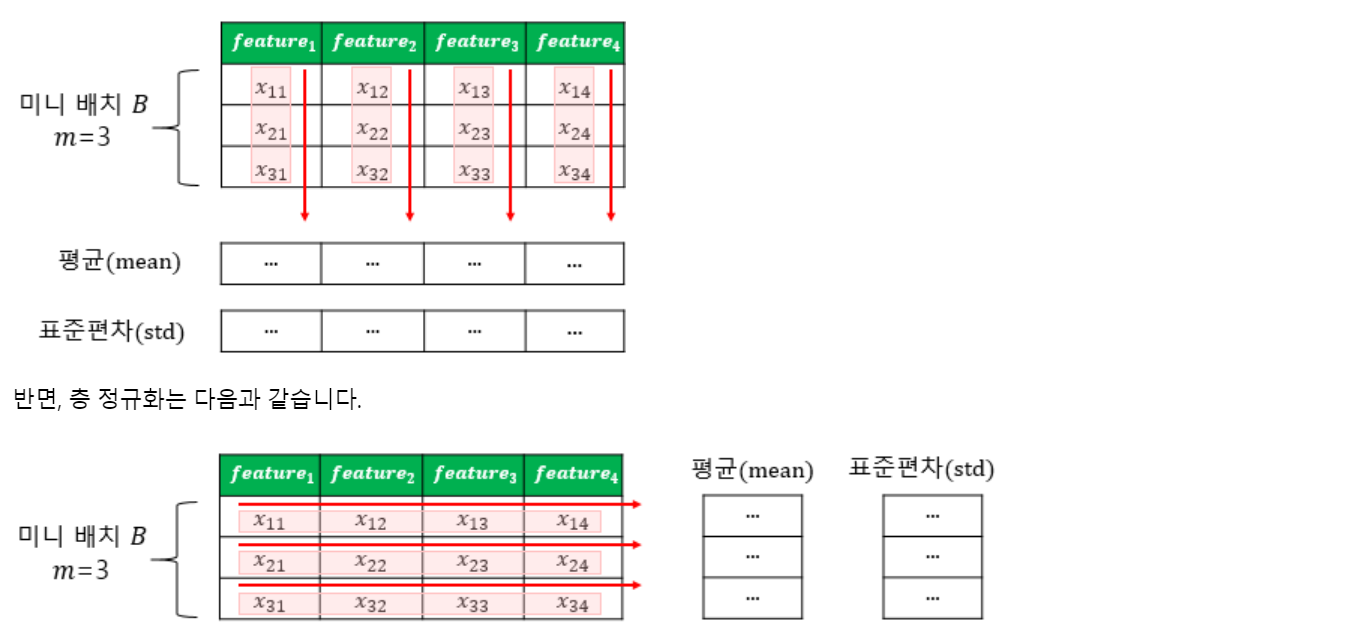

In [4]:
Image("o4.PNG")

----------------------------------------------------------------------------------------------------------

1. 가중치 초기화 참고 자료 
- http://nlp.jbnu.ac.kr/AI2019/slides/ch05-1.pdf
- https://reniew.github.io/13/
- https://calcifer1009-dev.tistory.com/11

2. 배치 정규화 인터넷 강의(한국어 자막) 
- https://www.youtube.com/watch?v=tNIpEZLv_eg
- https://www.youtube.com/watch?v=em6dfRxYkYU
- https://www.youtube.com/watch?v=nUUqwaxLnWs

3. 배치 정규화 참고자료 
- https://light-tree.tistory.com/139
- https://sacko.tistory.com/44?category=632408
- http://funmv2013.blogspot.com/2016/09/batch-normalization.html
- https://excelsior-cjh.tistory.com/178
- https://www.youtube.com/watch?v=HCEr5f-LfVE&list=PLQ28Nx3M4JrhkqBVIXg-i5_CVVoS1UzAv&index=17